In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Dataset: salaries.csv
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('DataSets/SF_salary_data_gender.csv')

foam.head()

,Id,Employee Name,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,gender
0,1,nathaniel ford,general manager-metropolitan transit authority,167411,0,400184,0,567595.43,567595.43,2011,San Francisco,NaN,m
1,2,gary jimenez,captain iii (police department),155966,245132,137811,0,538909.28,538909.28,2011,San Francisco,NaN,m
2,3,albert pardini,captain iii (police department),212739,106088,16452.6,0,335279.91,335279.91,2011,San Francisco,NaN,m
3,4,christopher chong,wire rope cable maintenance mechanic,77916,56120.7,198307,0,332343.61,332343.61,2011,San Francisco,NaN,m
4,5,patrick gardner,"deputy chief of department,(fire department)",134402,9737,182235,0,326373.19,326373.19,2011,San Francisco,NaN,m


In [3]:
foam= foam.drop_duplicates()

In [4]:
foam

,Id,Employee Name,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,gender
0,1,nathaniel ford,general manager-metropolitan transit authority,167411,0,400184,0,567595.43,567595.43,2011,San Francisco,NaN,m
1,2,gary jimenez,captain iii (police department),155966,245132,137811,0,538909.28,538909.28,2011,San Francisco,NaN,m
2,3,albert pardini,captain iii (police department),212739,106088,16452.6,0,335279.91,335279.91,2011,San Francisco,NaN,m
3,4,christopher chong,wire rope cable maintenance mechanic,77916,56120.7,198307,0,332343.61,332343.61,2011,San Francisco,NaN,m
4,5,patrick gardner,"deputy chief of department,(fire department)",134402,9737,182235,0,326373.19,326373.19,2011,San Francisco,NaN,m
5,6,david sullivan,assistant deputy chief ii,118602,8601,189083,0,316285.74,316285.74,2011,San Francisco,NaN,m
6,7,alson lee,"battalion chief, (fire department)",92492,89062.9,134426,0,315981.05,315981.05,2011,San Francisco,NaN,NaN
7,8,david kushner,deputy director of investments,256577,0,51322.5,0,307899.46,307899.46,2011,San Francisco,NaN,m
8,9,michael morris,"battalion chief, (fire department)",176933,86362.7,40132.2,0,303427.55,303427.55,2011,San Francisco,NaN,m
9,10,joanne hayes-white,"chief of department, (fire department)",285262,0,17115.7,0,302377.73,302377.73,2011,San Francisco,NaN,f


In [5]:
# Assign the data to X and y

X = foam[["TotalPayBenefits", "gender"]]
y = foam["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(148654, 2) (148654, 1)


In [6]:
#working with categorial data
data = X.copy()

data_binary_encoded = pd.get_dummies(foam, columns=["gender"])
data_binary_encoded.head()

,Id,Employee Name,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,gender_f,gender_m
0,1,nathaniel ford,general manager-metropolitan transit authority,167411,0,400184,0,567595.43,567595.43,2011,San Francisco,NaN,0,1
1,2,gary jimenez,captain iii (police department),155966,245132,137811,0,538909.28,538909.28,2011,San Francisco,NaN,0,1
2,3,albert pardini,captain iii (police department),212739,106088,16452.6,0,335279.91,335279.91,2011,San Francisco,NaN,0,1
3,4,christopher chong,wire rope cable maintenance mechanic,77916,56120.7,198307,0,332343.61,332343.61,2011,San Francisco,NaN,0,1
4,5,patrick gardner,"deputy chief of department,(fire department)",134402,9737,182235,0,326373.19,326373.19,2011,San Francisco,NaN,0,1


In [7]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()
### END SOLUTION

,TotalPayBenefits,gender_f,gender_m
56992,92038.47,0,0
3757,133422.12,0,1
128435,105072.93,1,0
65023,36567.63,0,1
15028,77900.35,0,0


In [8]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

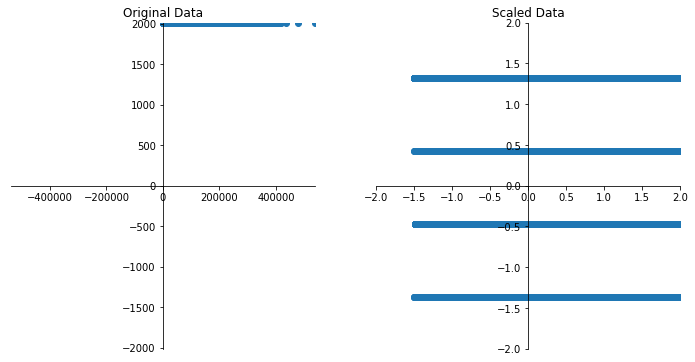

In [10]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["TotalPayBenefits"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["TotalPayBenefits"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
plt.savefig('TotalpaywithscaledData.png')

In [11]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION
### BEGIN SOLUTION
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.023807339562070262
Testing Score: 0.02542968230631837


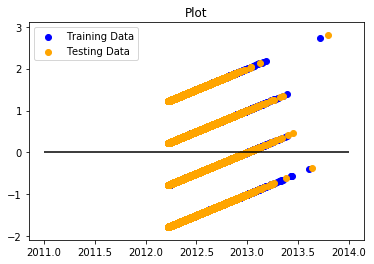

In [13]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Plot")
### END SOLUTION
plt.savefig('train&testdata.png')